In [1]:
using JLD2
using LinearAlgebra
using Plots
using LatticeAlgorithms

In [2]:
check_if_nan(num) = num <= 0 ? NaN : num

"""
    find_best_achievalble_rate(c_list, σrange, drange, num_modes_range)

Return the best achievable rate for a given σ for a range of distance

Args:
    c_list: The coherent information for a set of (d,σ)
    σrange: The range of σ
    drange: The range of d
    num_modes_range: The range of number of modes

Returns:
    ds: The optimal distance for each σ
    cs: The optimal achievable rate for each σ

Notes: The achievable rate is max(0, coherent-information divided by the number of modes)
"""    
function find_best_achievalble_rate(c_list, σrange, drange, num_modes_range)
    ds = Dict()
    cs = Dict()
    
    for σ in σrange
        c_list_2 = Dict(d => c_list[[σ, d]] for d in drange)
        c_list_3 = check_if_nan.(collect(values(sort(c_list_2))) ./ num_modes_range)
        c_list_3[isnan.(c_list_3)] .= -Inf
        if c_list_3 == [-Inf for _ in c_list_3]
            ds[σ] = NaN
            cs[σ] = NaN
        else
            dind = findmax(c_list_3)[2]
            d = drange[dind]
            ds[σ] = d
            cs[σ] = c_list_3[dind]
        end
    end    
    return ds, cs
end

find_best_achievalble_rate

# Fig 1

In [5]:
println("surf_sq")
data_surf_sq_3_21 = load("mld_surf_3_21_0.0_2.0_1.0_10016000.jld2") # 1e6 samples 
println(data_surf_sq_3_21["num_samples"])
data_surf_sq_23_23 = load("mld_surf_23_23_0.0_2.0_1.0_10016000.jld2")
println(data_surf_sq_23_23["num_samples"])
data_surf_sq_25_25 = load("mld_surf_25_25_0.0_2.0_1.0_10009600.jld2")
println(data_surf_sq_25_25["num_samples"])
data_surf_sq_27_27 = load("mld_surf_27_27_0.0_2.0_1.0_100160001.jld2")
println(data_surf_sq_27_27["num_samples"])
data_surf_sq_29_29 = load("mld_surf_29_29_0.0_2.0_1.0_10009600.jld2")
println(data_surf_sq_29_29["num_samples"])
data_surf_sq_31_31 = load("mld_surf_31_31_0.0_2.0_1.0_10016000.jld2")
println(data_surf_sq_31_31["num_samples"])
data_surf_sq_33_33 = load("mld_surf_33_33_0.0_2.0_1.0_10009600.jld2") # 6e4 samples
println(data_surf_sq_33_33["num_samples"])
data_surf_sq_35_35 = load("mld_surf_35_35_0.0_2.0_1.0_100160001.jld2")
println(data_surf_sq_35_35["num_samples"])
data_surf_sq_37_39 = load("mld_surf_37_39_0.0_2.0_1.0_10016000.jld2") # 6e4 samples 
println(data_surf_sq_37_39["num_samples"])
println()

println("color_sq")
data_color_sq_3_21 = load("color_square_3_21_0.0_2.0_1.0_128_10016000.jld2") # 1e6 samples # d=23 has issues
println(data_color_sq_3_21["num_samples"])
println()

println("color_hex")
data_color_hex_3_7 = load("color_hex_3_7_0.0_2.0_1.0_128_10016000.jld2") # d=9 -> 21 with bond-dim = 64
println(data_color_hex_3_7["num_samples"])
data_color_hex_9_9 = load("color_hex_9_9_0.0_2.0_1.0_64_10016000.jld2")
println(data_color_hex_9_9["num_samples"])
data_color_hex_11_11 = load("color_hex_11_11_0.0_2.0_1.0_64_10016000.jld2")
println(data_color_hex_11_11["num_samples"])
data_color_hex_13_13 = load("color_hex_13_13_0.0_2.0_1.0_64_100160001.jld2")
println(data_color_hex_13_13["num_samples"])
data_color_hex_15_15 = load("color_hex_15_15_0.0_2.0_1.0_64_10009.jld2")
println(data_color_hex_15_15["num_samples"])
println()

println("one mode")
data_one_mode_square = load("square_0.5_0.6_10000128.jld2")
println(data_one_mode_square["num_samples"])
data_one_mode_hex = load("hex_0.5_0.6_10000128.jld2")
println(data_one_mode_hex["num_samples"])

println("513 hex")
data_513_hex = load("../513-hex_0.5_0.6_10002496.jld2")
println(data_513_hex["num_samples"])

###################### surf-sq ######################
c_list_surf_sq = merge(
    data_surf_sq_3_21["c_list"],
    data_surf_sq_23_23["c_list"],
    data_surf_sq_25_25["c_list"],
    data_surf_sq_27_27["c_list"],
    data_surf_sq_29_29["c_list"],
    data_surf_sq_31_31["c_list"],
    data_surf_sq_33_33["c_list"],
    data_surf_sq_35_35["c_list"],
    data_surf_sq_37_39["c_list"],
)

c_list_one_mode_square = data_one_mode_square["c_list"]

drange_surf_sq = 1:2:39
σrange_surf_sq = data_surf_sq_3_21["σrange"]

for d in drange_surf_sq
    for σ in σrange_surf_sq
        if d==1
            if σ ∉ keys(c_list_one_mode_square)
                c_list_surf_sq[[σ, d]] = NaN
            else
                c_list_surf_sq[[σ, d]] = c_list_one_mode_square[σ]
            end            
        else
            if [σ, d] ∉ keys(c_list_surf_sq)
                c_list_surf_sq[[σ, d]] = NaN
            end            
        end
    end
end

num_modes_range_surf_sq = drange_surf_sq.^2
ds_surf_sq, cs_surf_sq = find_best_achievalble_rate(
    c_list_surf_sq, σrange_surf_sq, drange_surf_sq, num_modes_range_surf_sq
)

###################### surf-sq ######################

###################### color-sq ######################

c_list_color_sq = data_color_sq_3_21["c_list"]
σrange_color_sq = data_color_sq_3_21["σrange"]
drange_color_sq = 1:2:21

for σ in σrange_surf_sq
    if σ ∉ keys(c_list_one_mode_square)
        c_list_color_sq[[σ, 1.0]] = NaN
    else
        c_list_color_sq[[σ, 1.0]] = c_list_one_mode_square[σ]
    end
end

num_modes_range_color_sq = triangular_color_code_num_qubits.(drange_color_sq)
ds_color_sq, cs_color_sq = find_best_achievalble_rate(
    c_list_color_sq, σrange_color_sq, drange_color_sq, num_modes_range_color_sq
)


###################### color-sq ######################

###################### color-hex ######################

c_list_color_hex = merge(
    data_color_hex_3_7["c_list"],
    data_color_hex_9_9["c_list"],
    data_color_hex_11_11["c_list"],
    data_color_hex_13_13["c_list"],
    data_color_hex_15_15["c_list"],
)

c_list_one_mode_hex = data_one_mode_hex["c_list"]

σrange_color_hex = data_color_hex_3_7["σrange"]
drange_color_hex = 1:2:15

for d in drange_color_hex
    for σ in σrange_color_hex
        if d==1
            if σ ∉ keys(c_list_one_mode_hex)
                c_list_color_hex[[σ, d]] = NaN
            else
                c_list_color_hex[[σ, d]] = c_list_one_mode_hex[σ]
            end            
        else
            if [σ, d] ∉ keys(c_list_color_hex)
                c_list_color_hex[[σ, d]] = NaN
            end            
        end
    end
end

num_modes_range_color_hex = triangular_color_code_num_qubits.(drange_color_hex)
ds_color_hex, cs_color_hex = find_best_achievalble_rate(
    c_list_color_hex, σrange_color_hex, drange_color_hex, num_modes_range_color_hex
) ;


###################### color-hex ######################

###################### 513-hex ######################

σrange_513_hex = data_513_hex["σrange"]

c_list_513_hex = Dict()
for σ in σrange_513_hex
    c_list_513_hex[[σ, 3.0]] = data_513_hex["c_list"][σ]
end

ds_513_hex, cs_513_hex = find_best_achievalble_rate(
    c_list_513_hex, σrange_513_hex, [3], [5]
) ;

###################### 513-hex ######################

println()
println(values(sort(σrange_surf_sq)))
println(values(sort(σrange_color_sq)))
println(values(sort(σrange_color_hex)))
# println(values(sort(σrange_513_hex)))
println(values(sort(ds_surf_sq)))
println(values(sort(ds_color_sq)))
println(values(sort(ds_color_hex)))
# println(values(sort(ds_513_hex)))


surf_sq
10016000
10016000
9409024
10016000
10009600
10016000
600576
10016000
600960

color_sq
10016000

color_hex
10016000
10016000
10016000
2804480
1201152

one mode
10000128
10000128
513 hex
10002496

[0.5, 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.591, 0.592, 0.593, 0.594, 0.595, 0.596, 0.597, 0.598, 0.599, 0.6]
[0.5, 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.591, 0.592, 0.593, 0.594, 0.595, 0.596, 0.597, 0.598, 0.599, 0.6]
[0.5, 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.591, 0.592, 0.593, 0.594, 0.595, 0.596, 0.597, 0.598, 0.599, 0.6]
Any[1, 1, 1, 1, 1, 1, 3, 5, 11, 25, 27, 29, 33, 33, 39, 39, 39, 39, NaN, NaN]
Any[1, 1, 1, 1, 1, 3, 5, 7, 11, 21, 21, 21, 21, 21, NaN, NaN, NaN, NaN, NaN, NaN]
Any[1, 1, 1, 1, 3, 3, 5, 7, 9, 15, 15, 15, 15, 15, NaN, NaN, NaN, NaN, NaN, NaN]


In [6]:
for (key, val) in sort(c_list_surf_sq)
    if key[1] == 0.593
        println(key[2], " ", val)
    end
end

1.0 NaN
3.0 -0.15216461051953356
5.0 -0.12929801538211017
7.0 -0.108187940115966
9.0 -0.08606500403719242
11.0 -0.06506013643674624
13.0 -0.04512342680416759
15.0 -0.02423868380510874
17.0 -0.006308851176614061
19.0 0.012267615450074487
21.0 0.026472641594560642
23.0 0.047802236907881546
25.0 0.06355574552738907
27.0 0.08031942652867807
29.0 0.09654279400476495
31.0 0.11227075186235247
33.0 0.1292279778303218
35.0 0.14236221108252967
37.0 0.1588760208705563
39.0 0.16574063787272408


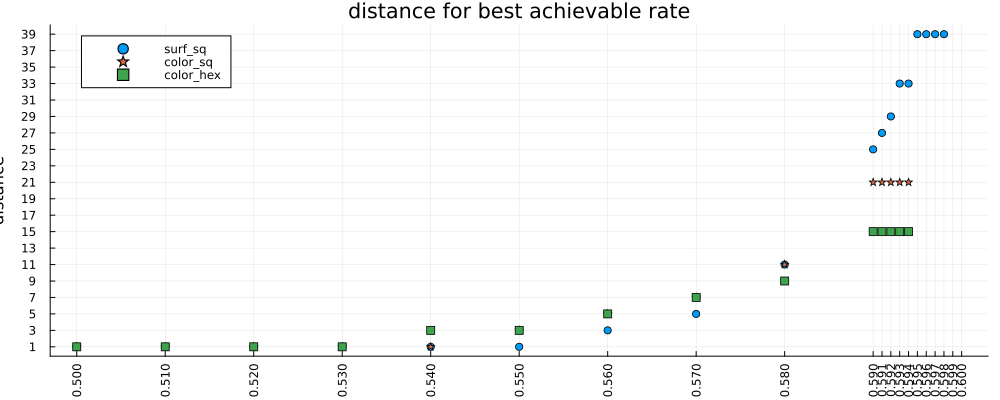

In [7]:
plot(σrange_surf_sq, collect(values(sort(ds_surf_sq))), seriestype=:scatter, label="surf_sq")

plot!(σrange_color_sq, collect(values(sort(ds_color_sq))), seriestype=:scatter, label="color_sq", marker=:star)

plot!(σrange_color_hex, collect(values(sort(ds_color_hex))), seriestype=:scatter, label="color_hex", marker=:square)

plot!(xlabel="σ", ylabel="distance", 
    title="distance for best achievable rate", 
    yticks=1:2:39, xticks=σrange_surf_sq, 
    xrotation=90,
    size=(1000, 400)
)

# We decide to remove the last 5 points with nonzero achievable rates. Thus,
## For surf-sq, we need to remove the last 7 points [5 points with nonzero achievable rates, 2 with NaN]
## For color-sq and color-hex, we need to remove the last 11 points [5 points with nonzero achievable rates, 6 with NaN]

cs_surf_sq
Any[0.22202552223795025, 0.17992341102313536, 0.13846831804392923, 0.09759096533062728, 0.05726154518666782, 0.01806829740191751, 0.008788998911356736, 0.003318090867157464, 0.0010443530724502507, 0.00021994128552893456, 0.00018082879058011614, 0.00014717556888680514, 0.00011866664630883545, 9.339244326937536e-5, 7.208747525828881e-5, 4.820947727176286e-5, 2.8609841930765434e-5, 4.23659797071962e-6, NaN, NaN]
cs_color_hex
Any[0.20571984998654336, 0.1603580445863666, 0.11412403140631211, 0.07169817829391811, 0.035356253848799195, 0.023437568872442034, 0.012081387286375936, 0.006151035789507564, 0.0026459405302672995, 0.0007287896956049726, 0.0005725499235711529, 0.0004164111222267246, 0.0002568496189555011, 9.31523168745943e-5, NaN, NaN, NaN, NaN, NaN, NaN]
cs_513_hex
Any[0.10824879827684272, 0.09434803087031014, 0.0800087954879393, 0.06484470086572594, 0.049310545963933604, 0.03383765779837922, 0.01837395523180709, 0.002893874743067304, NaN, NaN, NaN]


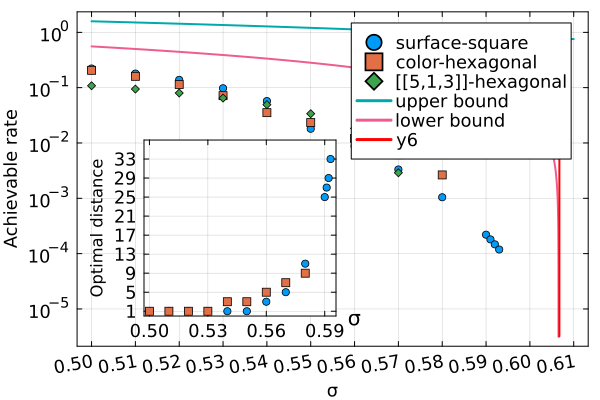

In [8]:
plot()

linecolors = get_color_palette(:auto, plot_color(:white))
linewidth = 2

@assert σrange_surf_sq == σrange_color_sq
@assert σrange_surf_sq == σrange_color_hex

σrange_surf_fig1 = σrange_surf_sq[1 : length(σrange_surf_sq)-7]
σrange_color_fig1 = σrange_color_sq[1 : length(σrange_color_sq)-11]

plot!(σrange_surf_fig1, 
    collect(values(sort(cs_surf_sq)))[1:length(σrange_surf_fig1)], 
    seriestype=:scatter, label="surface-square", marker=:circle
)

println("cs_surf_sq")
println(collect(values(sort(cs_surf_sq))))

# plot!(σrange_color_fig1,
#     collect(values(sort(cs_color_sq)))[1:length(σrange_color_fig1)], 
#     seriestype=:scatter, label="color-square", marker=:star
# )

# println("cs_color_sq")
# println(collect(values(sort(cs_color_sq))))

plot!(σrange_color_fig1,
    collect(values(sort(cs_color_hex)))[1:length(σrange_color_fig1)], 
    seriestype=:scatter, label="color-hexagonal", marker=:square
)

println("cs_color_hex")
println(collect(values(sort(cs_color_hex))))

plot!(σrange_513_hex,
    collect(values(sort(cs_513_hex))), 
    seriestype=:scatter, label="[[5,1,3]]-hexagonal", marker=:diamond
)


println("cs_513_hex")
println(collect(values(sort(cs_513_hex))))


# Upper and lower bound
# σrange2 = 0.5:0.00001:1/sqrt(exp(1))
σrange2 = 0.5:0.00001:0.61
plot!(σrange2, check_if_nan.(log2.((1 .- σrange2.^2) ./ (σrange2.^2))), label="upper bound", linewidth=linewidth, color=linecolors[6])
# plot!(σrange2, check_if_nan.(log2.((1) ./ (σrange2.^2))), label="wrong upper bound", linewidth=linewidth)
plot!(σrange2, check_if_nan.(log2.( 1 ./ (exp(1) * σrange2.^2))), label="lower bound", linewidth=linewidth, color=linecolors[7])


plot!(xlabel="σ", 
    ylabel="Achievable rate", 
    yaxis=:log,
    # grid=false,
    tickfontsize=12,
    labelfontsize=12,    
    xticks=0.50:0.01:0.61,
    yticks=[1, 0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001],
    xrotation = 10,
    # legend=false,
    legend=:topright,
    legendfontsize=12,
    framestyle = :box
)

ϵϵ = 0.0001 * 2
plot!([exp(-1/2)+ϵϵ, exp(-1/2)+ϵϵ], [1, 3.2e-6], color=:red, linewidth=2)

annotate!(0.56, 0.00000695, "σ")


plot!( 
    subplot = 2,
    inset = bbox(0.24, 0.35, 0.32, 0.44, :top, :left),
)

plot!(σrange_surf_fig1, 
    collect(values(sort(ds_surf_sq)))[1:length(σrange_surf_fig1)], 
    seriestype=:scatter, 
    marker=:circle, 
    subplot=2
)

# plot!(σrange_color_fig1, 
#     collect(values(sort(ds_color_sq)))[1:length(σrange_color_fig1)], 
#     seriestype=:scatter, 
#     marker=:star, 
#     subplot=2
# )

plot!(σrange_color_fig1, 
    collect(values(sort(ds_color_hex)))[1:length(σrange_color_fig1)],
    seriestype=:scatter, 
    marker=:square, 
    subplot=2
)

plot!(
    subplot=2,
    # xlabel="σ", 
    ylabel="Optimal distance", 
    legend=false,
    tickfontsize=12,    
    ylim = [0, 37],
    yticks = [1, 5, 9, 13, 17, 21, 25, 29, 33],
    xticks = [0.50, 0.53, 0.56, 0.59],
    framestyle = :box
)

In [9]:
# # savefig("plots/fig_1_no_caption.pdf");
# savefig("plots/fig_1_captioned.pdf");

# Fig 2

# Fig 3a

In [10]:
function get_p0list_sorted(p_list, drange, σrange)
    p0list_sorted = sort(p_list)
    p0list_sorted = collect(values(p0list_sorted))
    p0list_sorted = reshape(p0list_sorted, (length(drange), length(σrange)))
    p0list_sorted = [p0list_sorted[:,i] for i in 1:size(p0list_sorted,2)]
    return p0list_sorted
end


crossing(x1, x2, y1,y2, y3,y4) = (x2/(x2-x1) * (y4-y1-y3+y2)+y1-y2) / ((y4-y1-y3+y2)/(x2-x1))

function get_crossing(sorted_p0list, d_ind, σrange)
    diff = [item[d_ind] for item in sorted_p0list] - [item[d_ind+1] for item in sorted_p0list]
    ind_1st_positive = findfirst(x->x>0, diff)
    
    σ1 = σrange[ind_1st_positive-1]
    σ2 = σrange[ind_1st_positive]    
    y1 = sorted_p0list[ind_1st_positive][d_ind+1]
    y2 = sorted_p0list[ind_1st_positive][d_ind]
    y3 = sorted_p0list[ind_1st_positive-1][d_ind]
    y4 = sorted_p0list[ind_1st_positive-1][d_ind+1]    
    
    return crossing(σ1, σ2, y1, y2, y3, y4)
end

get_crossing (generic function with 1 method)

In [13]:
bsv_3_23 = load("bsv_surface_square_3_23_0.596_0.607_1.0e7.jld2")
cpd_3_29 = load("../cpd_surface_square_3_29_0.596_0.607_1.0e7.jld2");

5
9
13
17
21
23
[0.5986861145110838, 0.6005174147217235, 0.6009645306472353, 0.602112656823419, 0.6017591025641025, 0.6023515503875969, 0.601890942985863, 0.6023455657492354, 0.602606201941258, 0.6019447359607011]
[0.6029411447084232, 0.604040557667934, 0.6048069997463856, 0.6055294044044043, 0.6053437892095358, 0.6060981753272511, 0.6062607142857153, 0.6069227378791804, 0.6060641956438672, 0.606329221366091]


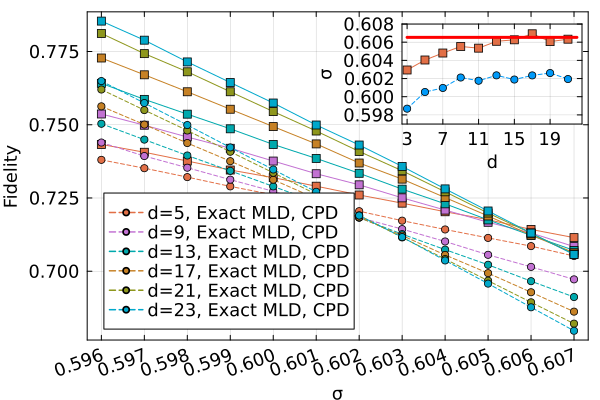

In [14]:
dmin = 3
dmax = 23
drange = dmin : 2 : dmax
σrange = cpd_3_29["σrange"]

p_list_cpd = cpd_3_29["p0list_exact"]
sorted_p_list_cpd = collect(values(sort(p_list_cpd)))

p_list_bsv = bsv_3_23["p_list"]
sorted_p_list_bsv = get_p0list_sorted(p_list_bsv, drange, σrange)

linecolors = get_color_palette(:auto, plot_color(:white))

plot()

for ind_d in 1 : length(drange)
    # ind_d == 1 && continue # exclude d=3
    ind_d ∈ [1,3,5,7,9] && continue # exclude d=3,7,11,15,19
    println(drange[ind_d])
    plot!(σrange, [item[ind_d] for item in sorted_p_list_cpd], marker=:circle, linestyle =:dash, color=linecolors[ind_d], 
        label="d=$(drange[ind_d]), Exact MLD, CPD")
    plot!(σrange, [item[ind_d] for item in sorted_p_list_bsv].^2, marker=:square, color=linecolors[ind_d], label="")
end



plot!(xlabel="σ", 
    ylabel="Fidelity", 
    # legend=false,
    xticks=round.(σrange, digits=3),
    # grid=false,
    tickfontsize=12,
    xrotation = 20,
    labelfontsize=12,
    framestyle = :box,
    legendfontsize=12,
    legendposition=:bottomleft
)


crossings_cpd = [get_crossing(sorted_p_list_cpd, d_ind, σrange) for d_ind in 1 : length(dmin:2:dmax)-1]
crossings_bsv = [get_crossing(sorted_p_list_bsv, d_ind, σrange) for d_ind in 1 : length(dmin:2:dmax)-1] ;


println(crossings_cpd)
println(crossings_bsv)

plot!(subplot=2,
    inset = bbox(0.03, 0.06, 0.3, 0.25, :top, :right),
    # grid = false,
    legend=false,
    tickfontsize=12,    
    labelfontsize=12,
    ylabel="σ",
    xlabel="d",
    ylim=[0.597, 0.608],
    xticks=dmin:4:(dmax-2),
    framestyle = :box
)

plot!((dmin:2:dmax)[1:end-1], 
    crossings_cpd, 
    marker=:circle,
    linestyle =:dash,
    subplot = 2
)

plot!((dmin:2:dmax)[1:end-1], 
    crossings_bsv, 
    marker=:square,
    subplot = 2
)

plot!([3, dmax-1], [exp(-1/2), exp(-1/2)], subplot = 2, color=:red, linewidth=3)


In [15]:
# savefig("plots/fig_3a_caption.pdf");

# Fig 3b

In [17]:
bsv_3_39_threshold = load("bsv_surface_square_3_39_threshold.jld2") ;

In [18]:
p_list_threshold = bsv_3_39_threshold["p_list"]
drange_threshold = bsv_3_39_threshold["drange"]
σrange_threshold = bsv_3_39_threshold["σrange"]

sorted_p_list_threshold = get_p0list_sorted(
    p_list_threshold,
    drange_threshold,
    σrange_threshold,
)

3-element Vector{Vector{Any}}:
 [0.8467687034014911, 0.8451848540846693, 0.8444573773639243, 0.8440481904579054, 0.8442189849924803, 0.8440056918178618, 0.8439754927842309, 0.8440836893219417, 0.8442560838053182, 0.8442083853316694, 0.844359437141625, 0.8447481592103372, 0.844691358271175, 0.8448959015477008, 0.8451096218787424, 0.8452775501217354, 0.8453185117829446, 0.8454096819520653, 0.8454962344781787]
 [0.8461231240600301, 0.8442416842661035, 0.8433142139451537, 0.8429425258391732, 0.8426712345204953, 0.8423344452977505, 0.8422717473040863, 0.8421090525103196, 0.8421946497712073, 0.8422411482832549, 0.842312461500308, 0.8421634626922985, 0.8420955295784853, 0.8423027601148095, 0.8422036935556774, 0.8422588928932853, 0.8422841699523844, 0.8421119310397591, 0.8421833969503787]
 [0.8454776447153691, 0.8435442065853893, 0.8425905371028127, 0.8416140683498128, 0.8412598796838501, 0.8409132907746952, 0.8408541926658347, 0.8404452057534159, 0.8402887107612557, 0.8401362156410995, 0.8399

[0.7170172370602425, 0.7143374375741237, 0.7131082621843573, 0.7124173478152644, 0.7127056946217336, 0.7123456078209475, 0.7122946324203854, 0.7124772745793402, 0.7127683350422925, 0.7126877978643045, 0.7129428590901218, 0.7135994524892532, 0.7135034907380026, 0.713849084452102, 0.714210272992031, 0.714494136739803, 0.7145633863629323, 0.7147175303382922, 0.7148638825167793]
[0.7159243410691051, 0.7127440214524672, 0.7111788634419325, 0.7105521018681251, 0.7100948094882956, 0.7095273177350689, 0.7094216963066785, 0.7091476563198282, 0.7092918281032465, 0.7093701518614958, 0.7094902827987078, 0.7092392978938824, 0.7091248809360696, 0.7094739396970263, 0.7093070614388253, 0.7094000426578225, 0.7094426229523773, 0.709152504399512, 0.7092728740988792]
[0.7148324477134479, 0.711566828463774, 0.7099588132152065, 0.7083142400443233, 0.7077181851656859, 0.7071351626015271, 0.7070357733237127, 0.7063481438739015, 0.7060851174328132, 0.7058288608317481, 0.7055239299201667, 0.7054144270635176, 0.

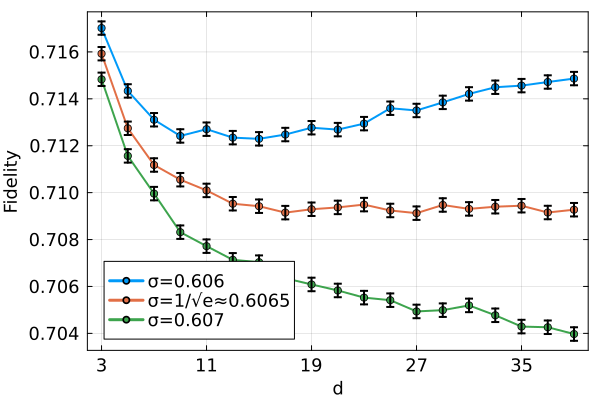

In [19]:
plot()
num_samples = 1e7
for (ind, σ) in enumerate(σrange_threshold)
    ind!=2 ? label="σ=$σ" : label="σ=1/√e≈0.6065"

    println(sorted_p_list_threshold[ind].^2)
    fidelity = sorted_p_list_threshold[ind].^2
    yerr = 2 .* sqrt.(fidelity .* (1 .- fidelity) / num_samples)
    plot!(drange_threshold, fidelity, yerr=yerr, marker=:circle, label=label, linewidth=2)
end

plot!(xlabel="d", 
    ylabel="Fidelity", 
    xticks=drange_threshold[1:4:end],
    # grid=false,
    tickfontsize=12,
    labelfontsize=12,
    legendfontsize=12,
    framestyle = :box,
    # legendposition=:topleft
    # ylim=[0.701,0.719]
)


In [20]:
# savefig("plots/fig_3b.pdf");

In [21]:
fidelity_06065 = sorted_p_list_threshold[2].^2
fidelity_06065_plateau = fidelity_06065[8:end]
max(fidelity_06065_plateau...) - min(fidelity_06065_plateau...)

0.00036540186263822605

In [22]:
sqrt(0.7 * 0.3 / 1e7)

0.0001449137674618944

# Fig 4

In [24]:
println("color_hex")
data_color_hex_3_9_fig4 = load("color_hex_3_9_0.601_0.605_0.001_64_100166401.jld2")
println(data_color_hex_3_9_fig4["num_samples"])
data_color_hex_11_13_fig4 = load("color_hex_11_13_0.601_0.605_0.001_64_100166401.jld2")
println(data_color_hex_11_13_fig4["num_samples"])

data_color_hex_3_7_threshold = load("color_hex_3_7_64_13563760_threshold.jld2")
println(data_color_hex_3_7_threshold["num_samples"])
data_color_hex_9_13_threshold = load("color_hex_9_13_64_8899548_threshold.jld2")
println(data_color_hex_9_13_threshold["num_samples"])
# data_color_hex_15_15_threshold = load("color_hex_15_15_64_9938528_threshold.jld2")
# println(data_color_hex_15_15_threshold["num_samples"])

println("surf_sq")
data_surf_sq_3_23_fig4 = load("bsv_surface_square_3_23_0.596_0.607_1.0e7.jld2")


# println(data_surf_sq_3_23_fig4["num_samples"])

drange_surf_sq_fig4 = 3:2:23

σrange_fig4 = 0.596:0.001:0.607 ;

p_list_surf_sq = data_surf_sq_3_23_fig4["p_list"]
sorted_p_list_surf_sq_fig4 = get_p0list_sorted(
    p_list_surf_sq, 
    drange_surf_sq_fig4, 
    σrange_fig4
)


p_list_color_hex_0 = merge(
    data_color_hex_3_7["p_list"],
    data_color_hex_9_9["p_list"],
    data_color_hex_11_11["p_list"],
    data_color_hex_13_13["p_list"],
    # data_color_hex_15_15["p_list"],
    
    data_color_hex_3_9_fig4["p_list"],
    data_color_hex_11_13_fig4["p_list"],

    data_color_hex_3_7_threshold["p_list"],
    data_color_hex_9_13_threshold["p_list"],
    # data_color_hex_15_15_threshold["p_list"],
)

drange_color_hex_fig4 = 3:2:13

p_list_color_hex = Dict()
for d in drange_color_hex_fig4
    for σ in σrange_fig4
        p_list_color_hex[[σ, d]] = p_list_color_hex_0[[σ, d]][1]
    end
end

sorted_p_list_color_hex_fig4 = get_p0list_sorted(
    p_list_color_hex, 
    drange_color_hex_fig4, 
    σrange_fig4
) ;




color_hex
10016640
9910080
13563760
8899548
surf_sq


[0.6029411447084232, 0.604040557667934, 0.6048069997463856, 0.6055294044044043, 0.6053437892095358]
[0.6060032381322454, 0.6052315459907452, 0.6054461254185179, 0.6053462063037436, 0.6053843260236499]


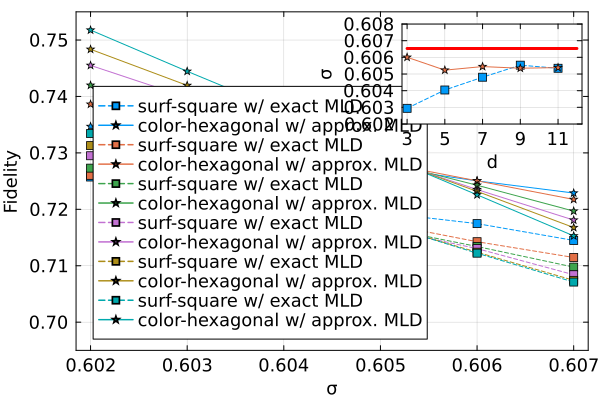

In [25]:
dmin = 3
dmax = 13
drange = dmin : 2 : dmax

σ_1st_ind = 7
inds = σ_1st_ind:length(σrange_fig4)

linecolors = get_color_palette(:auto, plot_color(:white))

plot()

for ind_d in 1 : length(drange)
    # ind_d == 1 && continue # exclude d=3
    plot!(σrange_fig4[inds], 
        [item[ind_d] for item in sorted_p_list_surf_sq_fig4[inds]].^2, 
        marker=:square, 
        linestyle=:dash, 
        color=linecolors[ind_d],
        label="surf-square w/ exact MLD",
    )
    plot!(σrange_fig4[inds], 
        [item[ind_d] for item in sorted_p_list_color_hex_fig4[inds]], 
        marker=:star, 
        color=linecolors[ind_d],
        label="color-hexagonal w/ approx. MLD"
    )
end



plot!(xlabel="σ", 
    ylabel="Fidelity", 
    # legend=false,
    legend=:bottomleft,
    legendfontsize=12,
    xticks=round.(σrange_fig4, digits=3),
    ylim=[0.695, 0.755],
    # grid=false,
    tickfontsize=12,
    # xrotation = 20,
    labelfontsize=12,
    framestyle = :box
)


crossings_bsv = [get_crossing(sorted_p_list_surf_sq_fig4, d_ind, σrange_fig4) for d_ind in 1 : length(dmin:2:dmax)-1] ;
crossings_color_hex = [get_crossing(sorted_p_list_color_hex_fig4, d_ind, σrange_fig4) for d_ind in 1 : length(dmin:2:dmax)-1] ;

println(crossings_bsv)
println(crossings_color_hex)

plot!(subplot=2, inset = bbox(0.03, 0.06, 0.3, 0.25, :top, :right))


plot!(subplot = 2,
    # grid = false,
    legend=false,
    ylim=[0.602, 0.608],
    tickfontsize=12,
    labelfontsize=12,
    xticks=dmin:2:(dmax-2),
    ylabel="σ",
    xlabel="d",
    framestyle = :box
)

plot!((dmin:2:dmax)[1:end-1], 
    crossings_bsv, 
    marker=:square,
    subplot = 2,
    linestyle =:dash,
)

plot!((dmin:2:dmax)[1:end-1], 
    crossings_color_hex, 
    marker=:star,
    subplot = 2,
)

plot!([3, dmax-1], [exp(-1/2), exp(-1/2)], subplot = 2, color=:red, linewidth=3)


In [26]:
# savefig("plots/fig_4_caption.pdf");
# savefig("plots/fig_4_no_caption.pdf");

In [27]:
sorted_p_list_color_hex_fig4

12-element Vector{Vector{Any}}:
 [0.7492898362619809, 0.7591605431309905, 0.7677919329073483, 0.7766629392971246, 0.7851198083067092, 0.7928920869465997]
 [0.7467942292332268, 0.7556268969648562, 0.7636227036741214, 0.771402356230032, 0.7792118610223642, 0.7866092822911912]
 [0.7447977236421726, 0.7523018170926518, 0.7594809305111822, 0.766363019169329, 0.772963857827476, 0.7797727207895938]
 [0.7419318091054313, 0.7488696086261981, 0.7550934504792333, 0.760986821086262, 0.7670787739616614, 0.7728395281834779]
 [0.7397502995207668, 0.7454542731629393, 0.7506723242811502, 0.7558510383386582, 0.7610213658146965, 0.7657062984938384]
 [0.7373565387195706, 0.7422112604625902, 0.7460676434413136, 0.7505386037633378, 0.7547436549452679, 0.7587323210307081]
 [0.7346781954827167, 0.7386224322726982, 0.7419813430451728, 0.7455029830362278, 0.7483519810132714, 0.7517606315993413]
 [0.7322860759695866, 0.735232473164654, 0.7377538775477606, 0.7398222357996295, 0.7419511245116084, 0.744454434272982

In [28]:
crossings_bsv

5-element Vector{Float64}:
 0.6029411447084232
 0.604040557667934
 0.6048069997463856
 0.6055294044044043
 0.6053437892095358

In [29]:
crossings_color_hex

5-element Vector{Float64}:
 0.6060032381322454
 0.6052315459907452
 0.6054461254185179
 0.6053462063037436
 0.6053843260236499

# Try adding color square into Fig 4

In [30]:
f_color_sq_0 = [
[0.7165428589536832, 0.7125211480353426, 0.7120152254547699, 0.709284665479383, 0.7061227133071414, 0.704818641523707],
[0.7194873292859798, 0.7169353317593319, 0.713103181129772, 0.7104075858236276, 0.7088875630617155, 0.704350678184699],
[0.7209626768187684, 0.7175513246136082, 0.7132736183923676, 0.7097727825816674, 0.7061730877357241, 0.7027500445501863],
[0.7239502082530003, 0.7189653845180295, 0.7144689384751572, 0.7100236390764372, 0.7056274604628352, 0.700649362653606],
[0.7241440419633786, 0.7200043768067286, 0.7143811125537165, 0.7101970758514986, 0.7048421276497141, 0.6995525683495228],
[0.7276954397913518, 0.7217552395031561, 0.7155063681243606, 0.7087546595505047, 0.70519950054558, 0.6989025884802629]
]

f_color_sq = []
for i = 1:6
    push!(f_color_sq, [item[i] for item in f_color_sq_0])
end
f_color_sq

6-element Vector{Any}:
 [0.7165428589536832, 0.7194873292859798, 0.7209626768187684, 0.7239502082530003, 0.7241440419633786, 0.7276954397913518]
 [0.7125211480353426, 0.7169353317593319, 0.7175513246136082, 0.7189653845180295, 0.7200043768067286, 0.7217552395031561]
 [0.7120152254547699, 0.713103181129772, 0.7132736183923676, 0.7144689384751572, 0.7143811125537165, 0.7155063681243606]
 [0.709284665479383, 0.7104075858236276, 0.7097727825816674, 0.7100236390764372, 0.7101970758514986, 0.7087546595505047]
 [0.7061227133071414, 0.7088875630617155, 0.7061730877357241, 0.7056274604628352, 0.7048421276497141, 0.70519950054558]
 [0.704818641523707, 0.704350678184699, 0.7027500445501863, 0.700649362653606, 0.6995525683495228, 0.6989025884802629]

In [31]:
sorted_p_list_surf_sq_fig4

12-element Vector{Vector{Float64}}:
 [0.8593684021113244, 0.8621363163787588, 0.8651709452975048, 0.8681468929942419, 0.8711743242162509, 0.8741491722648752, 0.8765813939539348, 0.8790846928982725, 0.8816126839411388, 0.8838393714011517, 0.8862210650900819]
 [0.8582028750799744, 0.8605883117402431, 0.8632662547984645, 0.8659344009916826, 0.8685729566538708, 0.871014775271913, 0.873394013915547, 0.8758153390914907, 0.8781985764555342, 0.8799336212412028, 0.8825395848314339]
 [0.8570052583173384, 0.8588459692898273, 0.8613031829814459, 0.8636037468010237, 0.8656148032629558, 0.8681120041586692, 0.8706513915547025, 0.872501299584133, 0.8746764035508637, 0.876402451215611, 0.8783219860747092]
 [0.8555517234484965, 0.8570602407229686, 0.859243242162508, 0.8613780590211132, 0.863203574856046, 0.8652285268714012, 0.8671713051823416, 0.8690800943698017, 0.8708488283749201, 0.8725075975687779, 0.8743091416148269]
 [0.8542569377799104, 0.8555339291426743, 0.8571323176583493, 0.8588432701535509, 

In [32]:
sorted_p_list_color_hex_fig4

12-element Vector{Vector{Any}}:
 [0.7492898362619809, 0.7591605431309905, 0.7677919329073483, 0.7766629392971246, 0.7851198083067092, 0.7928920869465997]
 [0.7467942292332268, 0.7556268969648562, 0.7636227036741214, 0.771402356230032, 0.7792118610223642, 0.7866092822911912]
 [0.7447977236421726, 0.7523018170926518, 0.7594809305111822, 0.766363019169329, 0.772963857827476, 0.7797727207895938]
 [0.7419318091054313, 0.7488696086261981, 0.7550934504792333, 0.760986821086262, 0.7670787739616614, 0.7728395281834779]
 [0.7397502995207668, 0.7454542731629393, 0.7506723242811502, 0.7558510383386582, 0.7610213658146965, 0.7657062984938384]
 [0.7373565387195706, 0.7422112604625902, 0.7460676434413136, 0.7505386037633378, 0.7547436549452679, 0.7587323210307081]
 [0.7346781954827167, 0.7386224322726982, 0.7419813430451728, 0.7455029830362278, 0.7483519810132714, 0.7517606315993413]
 [0.7322860759695866, 0.735232473164654, 0.7377538775477606, 0.7398222357996295, 0.7419511245116084, 0.744454434272982

[0.6029411447084232, 0.604040557667934, 0.6048069997463856, 0.6055294044044043, 0.6053437892095358]
[0.6060032381322454, 0.6052315459907452, 0.6054461254185179, 0.6053462063037436, 0.6053843260236499]
[0.6068552457796161, 0.6042116600712845, 0.605314954936881, 0.6039220584823263, 0.604438239629866]


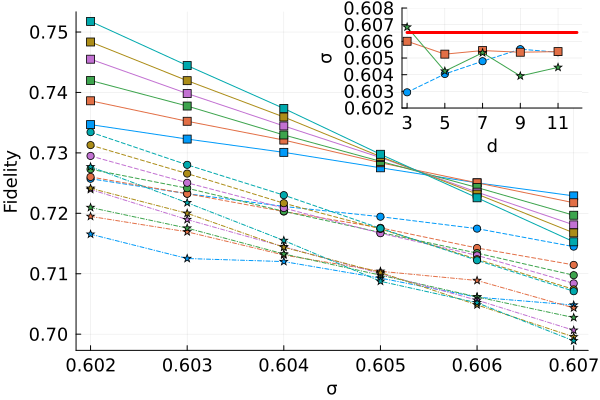

In [33]:
plot()
for ind_d in 1 : length(drange)
    # ind_d == 1 && continue # exclude d=3
    plot!(σrange_fig4[inds], 
        [item[ind_d] for item in sorted_p_list_surf_sq_fig4[inds]].^2, 
        marker=:circle, 
        linestyle=:dash, 
        color=linecolors[ind_d]
    )
    plot!(σrange_fig4[inds], 
        [item[ind_d] for item in sorted_p_list_color_hex_fig4[inds]], 
        marker=:square, 
        color=linecolors[ind_d]
    )
    plot!(σrange_fig4[inds], 
        [item[ind_d] for item in f_color_sq], 
        # f_color_sq[ind_d], 
        marker=:star, 
        linestyle=:dashdot, 
        color=linecolors[ind_d]
        )
end



plot!(xlabel="σ", 
    ylabel="Fidelity", 
    legend=false,
    xticks=round.(σrange_fig4, digits=3),
    # grid=false,
    tickfontsize=12,
    # xrotation = 20,
    labelfontsize=12
)



crossings_bsv = [get_crossing(sorted_p_list_surf_sq_fig4, d_ind, σrange) for d_ind in 1 : length(dmin:2:dmax)-1] ;
crossings_color_hex = [get_crossing(sorted_p_list_color_hex_fig4, d_ind, σrange) for d_ind in 1 : length(dmin:2:dmax)-1] ;
crossings_color_sq = [get_crossing(f_color_sq, d_ind, 0.602:0.001:0.607) for d_ind in 1 : length(dmin:2:dmax)-1] ;

println(crossings_bsv)
println(crossings_color_hex)
println(crossings_color_sq)

plot!(subplot=2, inset = bbox(0.03, 0.02, 0.3, 0.25, :top, :right))


plot!(subplot = 2,
    # grid = false,
    legend=false,
    ylim=[0.602, 0.608],
    tickfontsize=12,
    labelfontsize=12,
    xticks=dmin:2:(dmax-2),
    ylabel="σ",
    xlabel="d"
)

plot!((dmin:2:dmax)[1:end-1], 
    crossings_bsv, 
    marker=:circle,
    subplot = 2,
    linestyle =:dash,
)

plot!((dmin:2:dmax)[1:end-1], 
    crossings_color_hex, 
    marker=:square,
    subplot = 2,
)

plot!((dmin:2:dmax)[1:end-1], 
    crossings_color_sq, 
    marker=:star,
    subplot = 2,
)

plot!([3, dmax-1], [exp(-1/2), exp(-1/2)], subplot = 2, color=:red, linewidth=3)

# Appendix: Fig 5

[0.5, 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.591, 0.592, 0.593, 0.594, 0.595, 0.596, 0.597, 0.598, 0.599, 0.6]
surface-square
Any[0.22202552223795025, 0.17992341102313536, 0.13846831804392923, 0.09759096533062728, 0.05726154518666782, 0.01806829740191751, 0.008788998911356736, 0.003318090867157464, 0.0010443530724502507, 0.00021994128552893456, 0.00018082879058011614, 0.00014717556888680514, 0.00011866664630883545, 9.339244326937536e-5, 7.208747525828881e-5, 4.820947727176286e-5, 2.8609841930765434e-5, 4.23659797071962e-6, NaN, NaN]
color-square
Any[0.22202552223795025, 0.17992341102313536, 0.13846831804392923, 0.09759096533062728, 0.05726154518666782, 0.018325046546570727, 0.008751673282328171, 0.004022378465013872, 0.0015056599465056479, 0.0003688138576359333, 0.00029110327640033363, 0.00021594839916760385, 0.00014119532332340594, 6.522856336510441e-5, NaN, NaN, NaN, NaN, NaN, NaN]
color-hex
Any[0.20571984998654336, 0.1603580445863666, 0.11412403140631211, 0.07169817

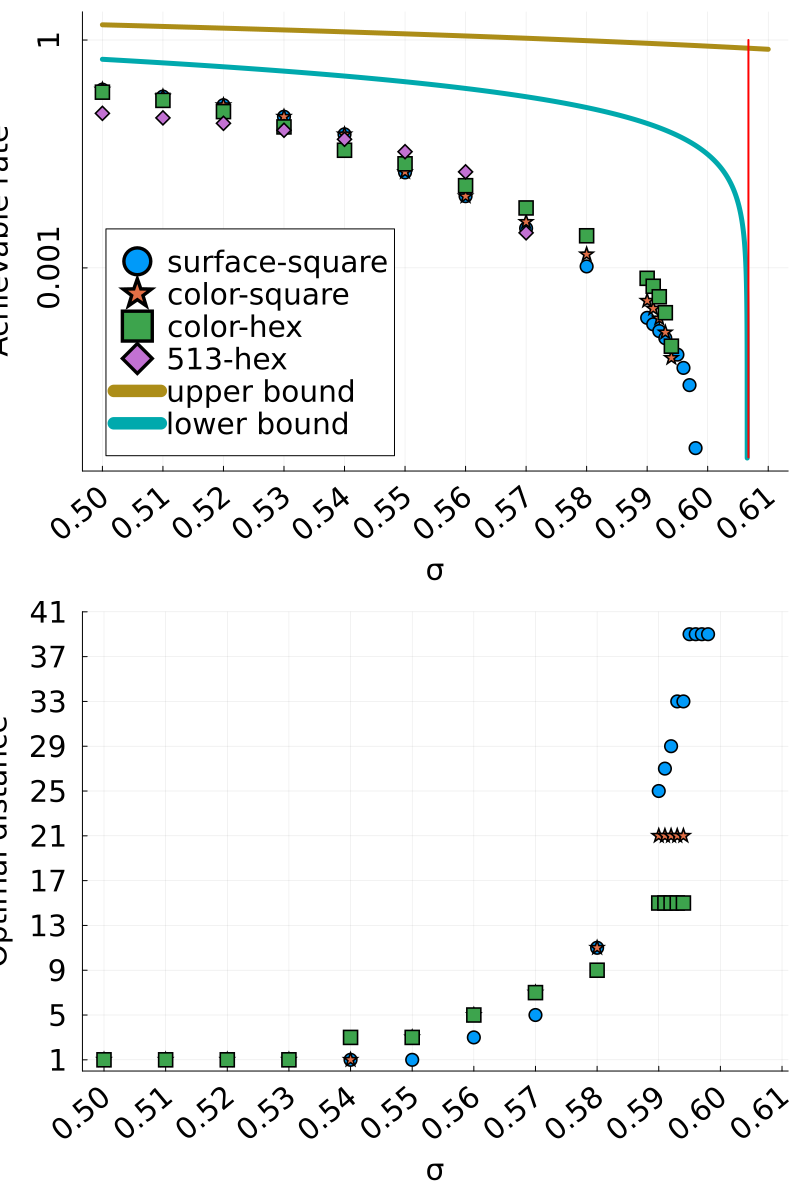

In [34]:
g1 = plot()

linecolors = get_color_palette(:auto, plot_color(:white))
linewidth = 5
fontsize = 20
height = 1200
width=800
markersize = 7
xrotation = 40


@assert σrange_surf_sq == σrange_color_sq
@assert σrange_surf_sq == σrange_color_hex

σrange_surf_fig1 = σrange_surf_sq[1 : length(σrange_surf_sq)]
σrange_color_fig1 = σrange_color_sq[1 : length(σrange_color_sq)]

println(σrange_surf_fig1)

println("surface-square")
println(collect(values(sort(cs_surf_sq)))[1:length(σrange_surf_fig1)])
plot!(σrange_surf_fig1, 
    collect(values(sort(cs_surf_sq)))[1:length(σrange_surf_fig1)], 
    seriestype=:scatter, label="surface-square", marker=:circle, markersize=markersize,
)

println("color-square")
println(collect(values(sort(cs_color_sq)))[1:length(σrange_color_fig1)])
plot!(σrange_color_fig1,
    collect(values(sort(cs_color_sq)))[1:length(σrange_color_fig1)], 
    seriestype=:scatter, label="color-square", marker=:star, markersize=markersize,
)

println("color-hex")
println(collect(values(sort(cs_color_hex)))[1:length(σrange_color_fig1)])
plot!(σrange_color_fig1,
    collect(values(sort(cs_color_hex)))[1:length(σrange_color_fig1)], 
    seriestype=:scatter, label="color-hex", marker=:square, markersize=markersize,
)

println("513-hex")
println(collect(values(sort(cs_513_hex))))
plot!(σrange_513_hex,
    collect(values(sort(cs_513_hex))), 
    seriestype=:scatter, label="513-hex", marker=:diamond, markersize=markersize,
)

# Upper and lower bound
σrange2 = 0.5:0.00001:0.61
plot!(σrange2, check_if_nan.(log2.((1 .- σrange2.^2) ./ (σrange2.^2))), label="upper bound", linewidth=linewidth)
plot!(σrange2, check_if_nan.(log2.( 1 ./ (exp(1) * σrange2.^2))), label="lower bound", linewidth=linewidth)


ϵϵ = 0.0001 * 2
plot!([exp(-1/2)+ϵϵ, exp(-1/2)+ϵϵ], [1, 3.2e-6], color=:red, linewidth=2, label="")

plot!(xlabel="σ", 
    ylabel="Achievable rate", 
    yaxis=:log,
    # grid=false,
    tickfontsize=fontsize,
    labelfontsize=fontsize,    
    xticks=0.50:0.01:0.61,
    legend=:bottomleft,
    legendfontsize=fontsize,
    xrotation=xrotation,
    yticks=([1, 0.001], ["1", "0.001"]),
    yrotation=90,
)

# annotate!(0.56, 0.00000695, "σ")

g2 = plot()

plot!(σrange_surf_fig1, 
    collect(values(sort(ds_surf_sq)))[1:length(σrange_surf_fig1)], 
    seriestype=:scatter, 
    marker=:circle, 
    markersize=markersize,    
)

plot!(σrange_color_fig1, 
    collect(values(sort(ds_color_sq)))[1:length(σrange_color_fig1)], 
    seriestype=:scatter, 
    marker=:star, 
    markersize=markersize,    
)

plot!(σrange_color_fig1, 
    collect(values(sort(ds_color_hex)))[1:length(σrange_color_fig1)],
    seriestype=:scatter, 
    marker=:square, 
    markersize=markersize,    
)

plot!(
    xlabel="σ", 
    ylabel="Optimal distance", 
    legend=false,
    tickfontsize=fontsize,
    labelfontsize=fontsize,
    ylim = [0, 41],
    xlim = [0.4965, 0.611],
    yticks = [1, 5, 9, 13, 17, 21, 25, 29, 33, 37, 41],
    xticks = 0.50:0.01:0.62,
    xrotation=xrotation
)

plot(g1, g2, layout=(2,1), size=(width,height))


In [35]:
# savefig("plots/fig_5.pdf"); # Need to use inkscape to postprocess the figure to show the y labels

# Appendix: Fig 6

3
5
7
9
11
13
15
17
19
21
23
[0.5986861145110838, 0.6005174147217235, 0.6009645306472353, 0.602112656823419, 0.6017591025641025, 0.6023515503875969, 0.601890942985863, 0.6023455657492354, 0.602606201941258, 0.6019447359607011]
[0.6029411447084232, 0.604040557667934, 0.6048069997463856, 0.6055294044044043, 0.6053437892095358, 0.6060981753272511, 0.6062607142857153, 0.6069227378791804, 0.6060641956438672, 0.606329221366091]


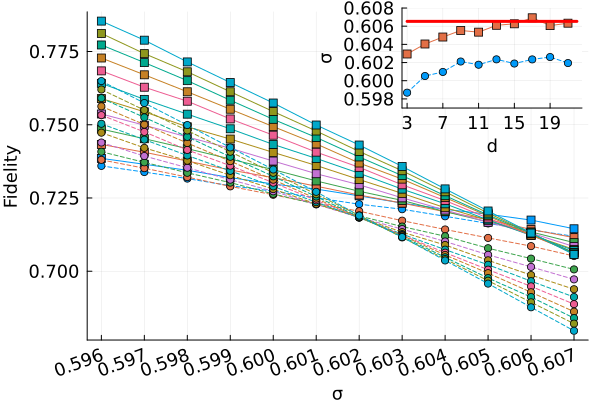

In [36]:
dmin = 3
dmax = 23
drange = dmin : 2 : dmax
σrange = cpd_3_29["σrange"]

p_list_cpd = cpd_3_29["p0list_exact"]
sorted_p_list_cpd = collect(values(sort(p_list_cpd)))

p_list_bsv = bsv_3_23["p_list"]
sorted_p_list_bsv = get_p0list_sorted(p_list_bsv, drange, σrange)

linecolors = get_color_palette(:auto, plot_color(:white))

plot()

for ind_d in 1 : length(drange)
    println(drange[ind_d])
    plot!(σrange, [item[ind_d] for item in sorted_p_list_cpd], marker=:circle, linestyle =:dash, color=linecolors[ind_d])
    plot!(σrange, [item[ind_d] for item in sorted_p_list_bsv].^2, marker=:square, color=linecolors[ind_d])
end



plot!(xlabel="σ", 
    ylabel="Fidelity", 
    legend=false,
    xticks=round.(σrange, digits=3),
    # grid=false,
    tickfontsize=12,
    xrotation = 20,
    labelfontsize=12
)


crossings_cpd = [get_crossing(sorted_p_list_cpd, d_ind, σrange) for d_ind in 1 : length(dmin:2:dmax)-1]
crossings_bsv = [get_crossing(sorted_p_list_bsv, d_ind, σrange) for d_ind in 1 : length(dmin:2:dmax)-1] ;


println(crossings_cpd)
println(crossings_bsv)

plot!(subplot=2,
    inset = bbox(0.03, 0.02, 0.3, 0.25, :top, :right),
    # grid = false,
    legend=false,
    tickfontsize=12,    
    labelfontsize=12,
    ylabel="σ",
    xlabel="d",
    ylim=[0.597, 0.608],
    xticks=dmin:4:(dmax-2),
)

plot!((dmin:2:dmax)[1:end-1], 
    crossings_cpd, 
    marker=:circle,
    linestyle =:dash,
    subplot = 2
)

plot!((dmin:2:dmax)[1:end-1], 
    crossings_bsv, 
    marker=:square,
    subplot = 2
)

plot!([3, dmax-1], [exp(-1/2), exp(-1/2)], subplot = 2, color=:red, linewidth=3)


In [38]:
# savefig("plots/fig_6.pdf");

# Appendix: Fig 7?

In [40]:
data_color_hex_3_7_threshold = load("color_hex_3_7_64_13563760_threshold.jld2")

data_color_hex_9_13_threshold = load("color_hex_9_13_64_8899548_threshold.jld2")

data_color_hex_15_15_threshold = load("color_hex_15_15_64_9938528_threshold.jld2")

data_surf_sq_3_39_fig2 = load("bsv_surface_square_3_39_threshold.jld2") ;

σrange_threshold = [0.606, exp(-1/2), 0.607] ;
drange_surf_sq_threshold = 3:2:39
drange_color_hex_threshold = 3:2:15 ;

In [41]:
p_list_surf_sq = data_surf_sq_3_39_fig2["p_list"]
sorted_p_list_surf_sq = get_p0list_sorted(
    p_list_surf_sq, 
    drange_surf_sq_threshold,
    σrange_threshold
) 

p_list_color_hex = merge(
    data_color_hex_3_7_threshold["p_list"],
    data_color_hex_9_13_threshold["p_list"],
    data_color_hex_15_15_threshold["p_list"],
)
sorted_p_list_color_hex = get_p0list_sorted(
    Dict([k=> v[1] for (k, v) in p_list_color_hex]), 
    drange_color_hex_threshold, 
    σrange_threshold
) ;


0.606
[0.7170172370602425, 0.7143374375741237, 0.7131082621843573, 0.7124173478152644, 0.7127056946217336, 0.7123456078209475, 0.7122946324203854, 0.7124772745793402, 0.7127683350422925, 0.7126877978643045, 0.7129428590901218, 0.7135994524892532, 0.7135034907380026, 0.713849084452102, 0.714210272992031, 0.714494136739803, 0.7145633863629323, 0.7147175303382922, 0.7148638825167793]
[0.7250400331471509, 0.7250437194406271, 0.7242631099341186, 0.7234978675321488, 0.7231806604110681, 0.7225684944898325, 0.7210471208613589]

0.6065306597126334
[0.7159243410691051, 0.7127440214524672, 0.7111788634419325, 0.7105521018681251, 0.7100948094882956, 0.7095273177350689, 0.7094216963066785, 0.7091476563198282, 0.7092918281032465, 0.7093701518614958, 0.7094902827987078, 0.7092392978938824, 0.7091248809360696, 0.7094739396970263, 0.7093070614388253, 0.7094000426578225, 0.7094426229523773, 0.709152504399512, 0.7092728740988792]
[0.7236338596377405, 0.7233468448276879, 0.7219434729013194, 0.720512210283

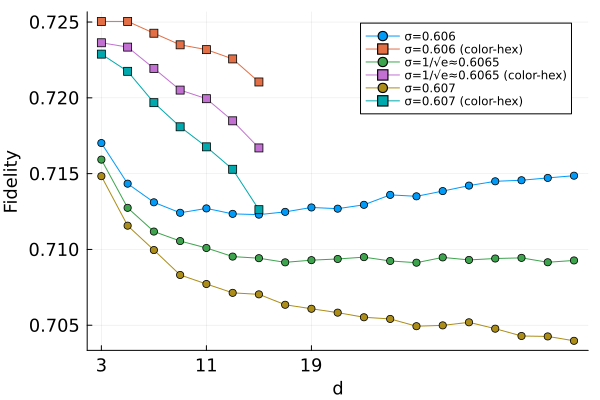

In [42]:
plot()
for (ind, σ) in enumerate(σrange_threshold)
    ind!=2 ? label="σ=$σ" : label="σ=1/√e≈0.6065"

    println(σ)
    println(sorted_p_list_surf_sq[ind].^2)
    plot!(drange_surf_sq_threshold, sorted_p_list_surf_sq[ind].^2, marker=:circle, label=label)

    println(sorted_p_list_color_hex[ind])
    plot!(drange_color_hex_threshold, sorted_p_list_color_hex[ind], marker=:square, label=label * " (color-hex)")
    println()
end

plot!(xlabel="d", 
    ylabel="Fidelity", 
    xticks=drange[1:4:end],
    # grid=false,
    tickfontsize=12,
    labelfontsize=12
)


# Appendix fig 8

In [44]:
println("color_hex")
data_color_hex_3_9_fig4 = load("color_hex_3_9_0.601_0.605_0.001_64_100166401.jld2")
println(data_color_hex_3_9_fig4["num_samples"])
data_color_hex_11_13_fig4 = load("color_hex_11_13_0.601_0.605_0.001_64_100166401.jld2")
println(data_color_hex_11_13_fig4["num_samples"])

data_color_hex_3_7_threshold = load("color_hex_3_7_64_13563760_threshold.jld2")
println(data_color_hex_3_7_threshold["num_samples"])
data_color_hex_9_13_threshold = load("color_hex_9_13_64_8899548_threshold.jld2")
println(data_color_hex_9_13_threshold["num_samples"])
# data_color_hex_15_15_threshold = load("color_hex_15_15_64_9938528_threshold.jld2")
# println(data_color_hex_15_15_threshold["num_samples"])

println("surf_sq")
data_surf_sq_3_23_fig4 = load("bsv_surface_square_3_23_0.596_0.607_1.0e7.jld2")


# println(data_surf_sq_3_23_fig4["num_samples"])

drange_surf_sq_fig4 = 3:2:23

σrange_fig4 = 0.596:0.001:0.607 ;

p_list_surf_sq = data_surf_sq_3_23_fig4["p_list"]
sorted_p_list_surf_sq_fig4 = get_p0list_sorted(
    p_list_surf_sq, 
    drange_surf_sq_fig4, 
    σrange_fig4
)


p_list_color_hex_0 = merge(
    data_color_hex_3_7["p_list"],
    data_color_hex_9_9["p_list"],
    data_color_hex_11_11["p_list"],
    data_color_hex_13_13["p_list"],
    # data_color_hex_15_15["p_list"],
    
    data_color_hex_3_9_fig4["p_list"],
    data_color_hex_11_13_fig4["p_list"],

    data_color_hex_3_7_threshold["p_list"],
    data_color_hex_9_13_threshold["p_list"],
    # data_color_hex_15_15_threshold["p_list"],
)

drange_color_hex_fig4 = 3:2:13

p_list_color_hex = Dict()
for d in drange_color_hex_fig4
    for σ in σrange_fig4
        p_list_color_hex[[σ, d]] = p_list_color_hex_0[[σ, d]][1]
    end
end

sorted_p_list_color_hex_fig4 = get_p0list_sorted(
    p_list_color_hex, 
    drange_color_hex_fig4, 
    σrange_fig4
) ;


println("color_square")
data_color_sq_3_21 = load("color_square_3_21_0.0_2.0_1.0_128_10016000.jld2") # 1e6 samples # d=23 has issues
println(data_color_sq_3_21["num_samples"])

p_list_color_square_0 = data_color_sq_3_21["p_list"]

drange_color_square_fig7 = 3:2:21

σrange_fig7_color_square = 0.596:0.001:0.600

p_list_color_square = Dict()
for d in drange_color_square_fig7
    for σ in σrange_fig7_color_square
        p_list_color_square[[σ, d]] = p_list_color_square_0[[σ, d]][1]
    end
end

sorted_p_list_color_square_fig7 = get_p0list_sorted(
    p_list_color_square, 
    drange_color_square_fig7, 
    σrange_fig7_color_square
) ;



color_hex
10016640
9910080
13563760
8899548
surf_sq
color_square
10016000


[0.6029411447084232, 0.604040557667934, 0.6048069997463856, 0.6055294044044043, 0.6053437892095358]
[0.6060032381322454, 0.6052315459907452, 0.6054461254185179, 0.6053462063037436, 0.6053843260236499]


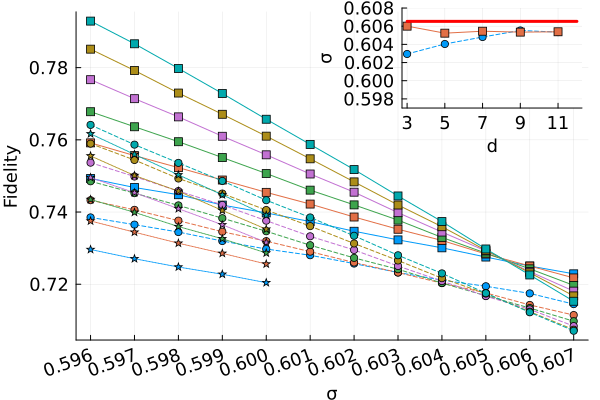

In [45]:
dmin = 3
dmax = 13
drange = dmin : 2 : dmax

σ_1st_ind = 1
inds = σ_1st_ind:length(σrange_fig4)

linecolors = get_color_palette(:auto, plot_color(:white))

plot()

for ind_d in 1 : length(drange)
    # ind_d == 1 && continue # exclude d=3
    plot!(σrange_fig4[inds], 
        [item[ind_d] for item in sorted_p_list_surf_sq_fig4[inds]].^2, 
        marker=:circle, 
        linestyle=:dash, 
        color=linecolors[ind_d]
    )
    plot!(σrange_fig4[inds], 
        [item[ind_d] for item in sorted_p_list_color_hex_fig4[inds]], 
        marker=:square, 
        color=linecolors[ind_d]
    )
end

for ind_d in 1 : length(drange)
    # ind_d == 1 && continue # exclude d=3
    plot!(σrange_fig7_color_square, 
        [item[ind_d] for item in sorted_p_list_color_square_fig7].^2, 
        marker=:star, 
        linestyle=:dot, 
        color=linecolors[ind_d]
    )
end



plot!(xlabel="σ", 
    ylabel="Fidelity", 
    legend=false,
    xticks=round.(σrange_fig4, digits=3),
    # grid=false,
    tickfontsize=12,
    xrotation = 20,
    labelfontsize=12
)


crossings_bsv = [get_crossing(sorted_p_list_surf_sq_fig4, d_ind, σrange) for d_ind in 1 : length(dmin:2:dmax)-1] ;

crossings_color_hex = [get_crossing(sorted_p_list_color_hex_fig4, d_ind, σrange) for d_ind in 1 : length(dmin:2:dmax)-1] ;

println(crossings_bsv)
println(crossings_color_hex)

plot!(subplot=2, inset = bbox(0.03, 0.02, 0.3, 0.25, :top, :right))


plot!(subplot = 2,
    # grid = false,
    legend=false,
    ylim=[0.597, 0.608],
    tickfontsize=12,
    labelfontsize=12,
    xticks=dmin:2:(dmax-2),
    ylabel="σ",
    xlabel="d"
)

plot!((dmin:2:dmax)[1:end-1], 
    crossings_bsv, 
    marker=:circle,
    subplot = 2,
    linestyle =:dash,
)

plot!((dmin:2:dmax)[1:end-1], 
    crossings_color_hex, 
    marker=:square,
    subplot = 2,
)

plot!([3, dmax-1], [exp(-1/2), exp(-1/2)], subplot = 2, color=:red, linewidth=3)


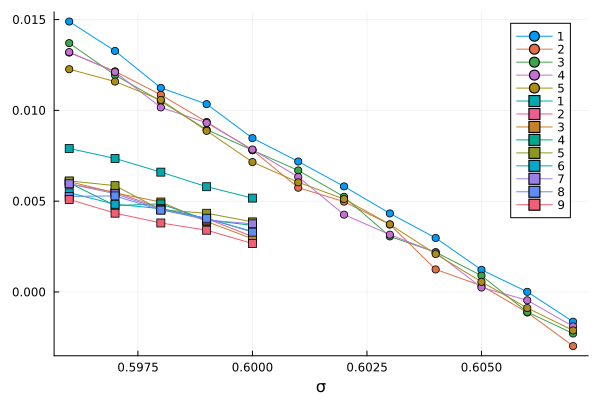

In [46]:
plot()

for ind in 1:5
    diff_color_hex = [item[ind+1]^2 - item[ind]^2 for item in sorted_p_list_color_hex_fig4]
    plot!(σrange_fig4, diff_color_hex, marker=:circle, label="$ind")
end

for ind in 1:9
    diff_color_square = [item[ind+1]^2 - item[ind]^2 for item in sorted_p_list_color_square_fig7]
    plot!(σrange_fig7_color_square, diff_color_square, marker=:square, label="$ind")
end


plot!(xlabel="σ")